<a href="https://colab.research.google.com/github/1012357482/cienciaDatosETITC/blob/proyecto_Ciencia_Datos_ETITC/proyecto_hearthDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Entendimiento del negocio

Para entender realmente el conjunto de datos, se estudiará el significado y la relevancia de cada variable con respecto al problema. Se buscará responder a diversas cuestiones sobre ellas, como:

*  Entendimiento de los datos.
*  La relevancia de las variables.

Para el conjunto de datos [Cardiovascular Disease dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset), se buscará la predicción de enfermedades cardiacas, deteraminada en el conjunto de datos para la variable objetivo **cardio**

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
dataset=pd.read_csv('/content/cardio_train.csv', sep=';')

Las variables del conjunto de datos **Cardiovascular Disease dataset**, se describen a continuación:

In [81]:
datos = pd.DataFrame()
atributo=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
significado=['Edad', 'Altura', 'Peso', 'Genero', 'Presión arterial sistólica', 'Presión arterial diastólica', 'Colesterol', 'Glucosa', 'Fuma', 'Consumo de alcohol', 'Actividad física', 'Presencia o ausencia de enfermedad cardiovascular ']
tipoDato=['int (días)', 'int (cm)', 'float(kg)', 'binario', 'int', 'int' , 'int(1,2,3)', 'int(1,2,3)', 'binario', 'binario', 'binario', 'binario']
datos['Atributo']=atributo
datos['Significado']=significado
datos['Tipo de dato']=tipoDato
datos


,Atributo,Significado,Tipo de dato
0,age,Edad,int (días)
1,gender,Altura,int (cm)
2,height,Peso,float(kg)
3,weight,Genero,binario
4,ap_hi,Presión arterial sistólica,int
5,ap_lo,Presión arterial diastólica,int
6,cholesterol,Colesterol,"int(1,2,3)"
7,gluc,Glucosa,"int(1,2,3)"
8,smoke,Fuma,binario
9,alco,Consumo de alcohol,binario


# 2. Entendimiento de los datos

In [28]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Se elimina la columna que indica la numeración de los registros en el conjunto de datos.

In [29]:
dataini = dataset
# axis=1 --> elimina columnas
dataini = dataini.drop(['id', ], axis=1)

Número de filas y columnas en el conjunto de datos.

In [30]:
print('Cantidad de Filas y columnas:',dataini.shape)

Cantidad de Filas y columnas: (70000, 12)


In [31]:
print(dataini.columns)

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


Descripción de los datos.

In [32]:
dataini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


Descripción estadística de los datos numéricos(por columna)

In [33]:
dataini.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# 3. Exploración de datos

## 3.1 Análisis univarido de la variable objetivo, cardio i.e  la variable a predecir.

In [46]:
dataini['cardio'].describe()

count    70000.000000
mean         0.499700
std          0.500003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cardio, dtype: float64

###3.1.2 Histograma de la distribución de la variable objetivo

<Axes: xlabel='cardio', ylabel='Count'>

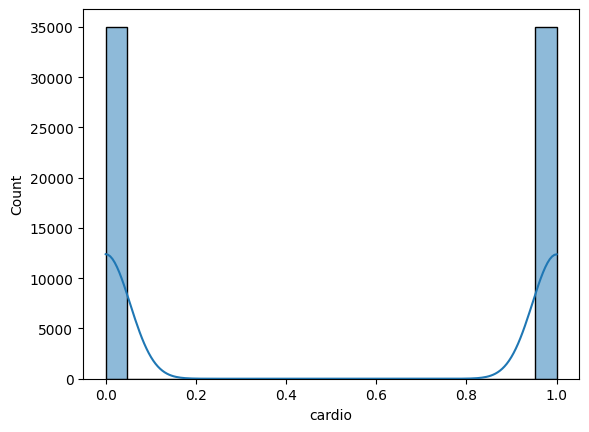

In [52]:
sns.histplot(dataini['cardio'],kde=True)

### 3.1.3 Asimetria y cortuasis de la variable objetivo

 

*   Se evidencia que la asimetria a la derecha es igual a la simetria a la izquieda, esto es que misma cantidad de registros de la izquierda(0) es igual al de la derecha(1).
*   La punta de la curva esta completamente achatada por lo que su valor es negativo.



In [51]:
#Asimetria y cortuasis
print("Asimetria: %f" % dataini['cardio'].skew()) #asimetria centro es 0 la ideal(normal), a la izquierda asimetria positiva, a la derecha asimetria positiva
print("Cortuasis: %f" % dataini['cardio'].kurt()) # mide el achsatamiento de la punta de la distribución normal, 0 la ideal , >0 muy achatada , 0> muy apuntalada

Asimetria: 0.001200
Cortuasis: -2.000056


###3.1.4 diagramas de dispersión de cada variable con respecto a la variable objetivo cardio.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


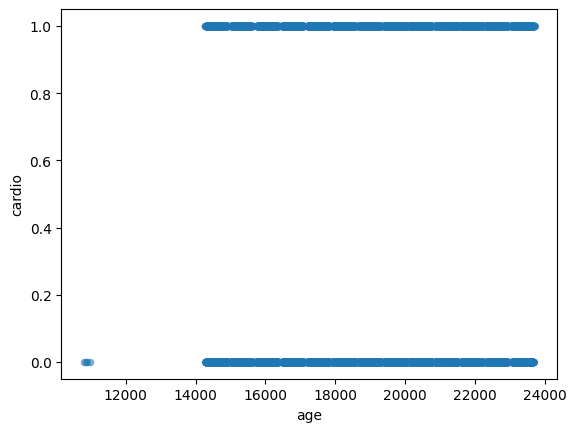

In [53]:
# Diagrama de dispersión age/cardio:

var = 'age'
data = pd.concat([dataini['cardio'], dataini[var]], axis=1)
data.plot.scatter(x=var, y='cardio', alpha = 0.5);

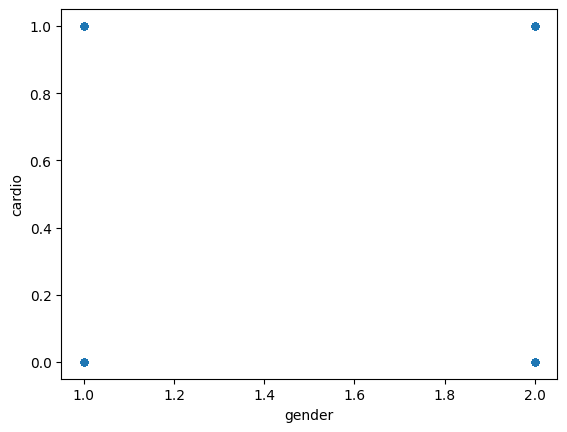

In [54]:
# Diagrama de dispersión gender/cardio:

var = 'gender'
data = pd.concat([dataini['cardio'], dataini[var]], axis=1)
data.plot.scatter(x=var, y='cardio', alpha = 0.5);

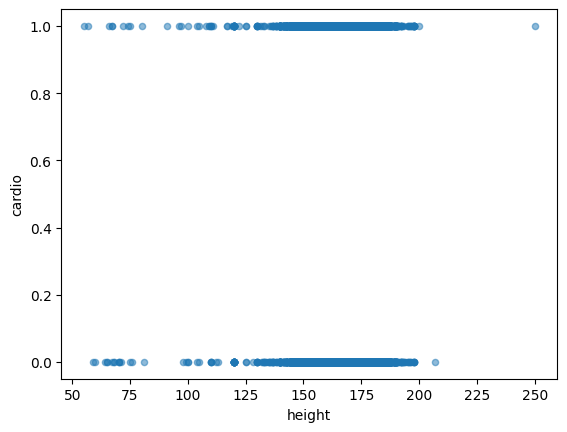

In [55]:
# Diagrama de dispersión height/cardio:

var = 'height'
data = pd.concat([dataini['cardio'], dataini[var]], axis=1)
data.plot.scatter(x=var, y='cardio', alpha = 0.5);

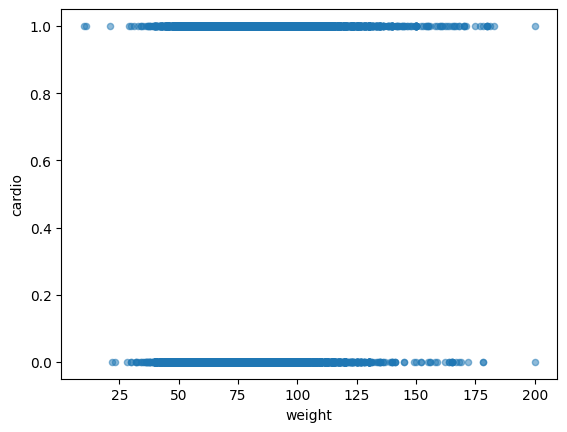

In [56]:
# Diagrama de dispersión weight/cardio:

var = 'weight'
data = pd.concat([dataini['cardio'], dataini[var]], axis=1)
data.plot.scatter(x=var, y='cardio', alpha = 0.5);

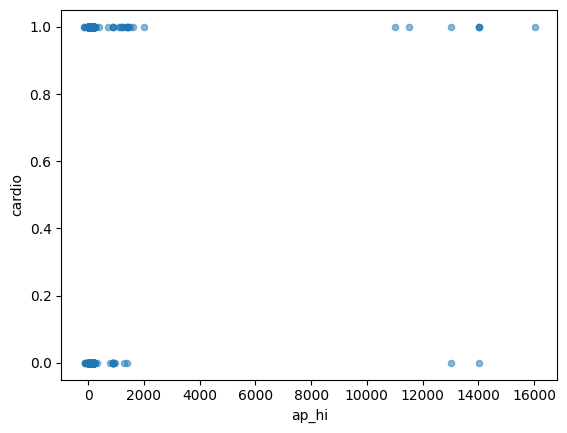

In [57]:
# Diagrama de dispersión ap_hi/cardio:

var = 'ap_hi'
data = pd.concat([dataini['cardio'], dataini[var]], axis=1)
data.plot.scatter(x=var, y='cardio', alpha = 0.5);

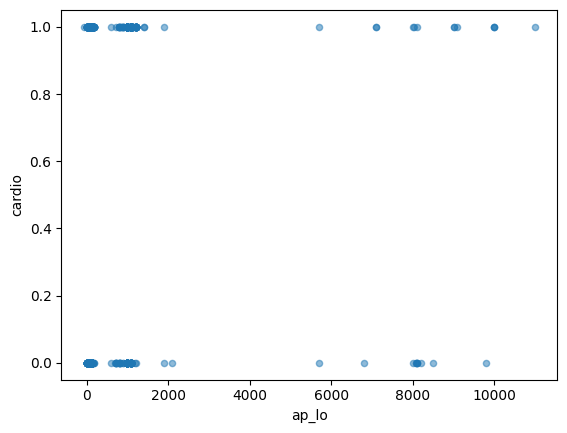

In [58]:
# Diagrama de dispersión ap_lo/cardio:

var = 'ap_lo'
data = pd.concat([dataini['cardio'], dataini[var]], axis=1)
data.plot.scatter(x=var, y='cardio', alpha = 0.5);

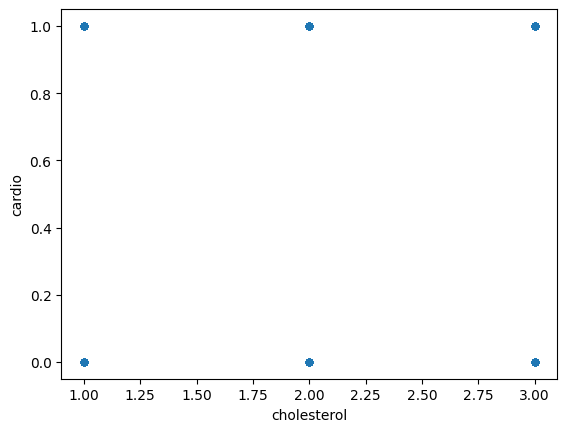

In [59]:
# Diagrama de dispersión cholesterol/cardio:

var = 'cholesterol'
data = pd.concat([dataini['cardio'], dataini[var]], axis=1)
data.plot.scatter(x=var, y='cardio', alpha = 0.5);

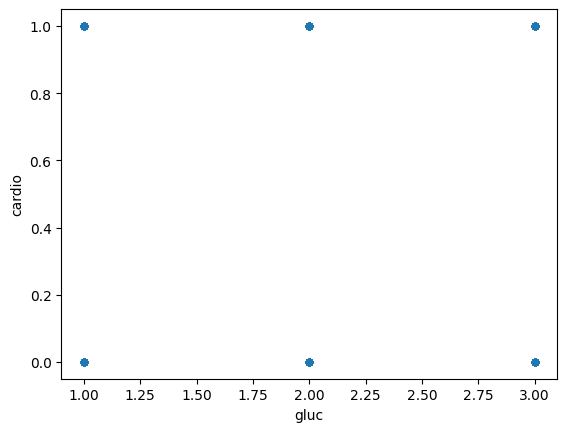

In [60]:
# Diagrama de dispersión gluc/cardio:

var = 'gluc'
data = pd.concat([dataini['cardio'], dataini[var]], axis=1)
data.plot.scatter(x=var, y='cardio', alpha = 0.5);

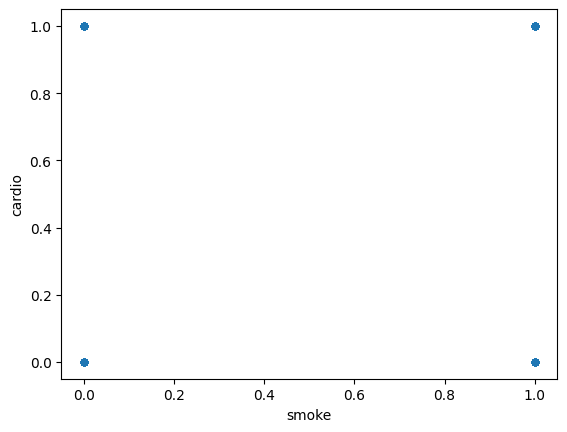

In [61]:
# Diagrama de dispersión smoke/cardio:

var = 'smoke'
data = pd.concat([dataini['cardio'], dataini[var]], axis=1)
data.plot.scatter(x=var, y='cardio', alpha = 0.5);

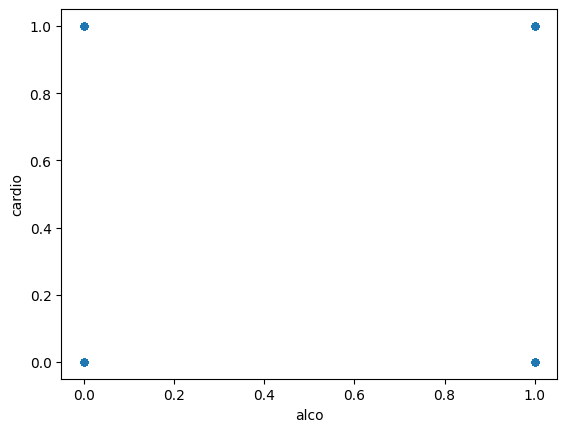

In [62]:
# Diagrama de dispersión alco/cardio:

var = 'alco'
data = pd.concat([dataini['cardio'], dataini[var]], axis=1)
data.plot.scatter(x=var, y='cardio', alpha = 0.5);

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


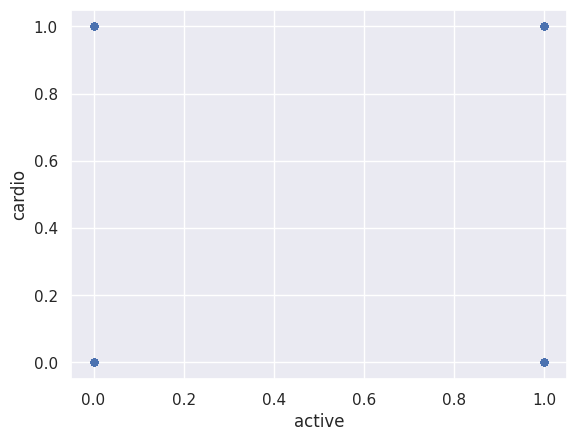

In [82]:
# Diagrama de dispersión active/cardio:

var = 'active'
data = pd.concat([dataini['cardio'], dataini[var]], axis=1)
data.plot.scatter(x=var, y='cardio', alpha = 0.5);

##3.2 Anáslis multivariado
###3.2.1 Calculo de los datos de correlación.

[]

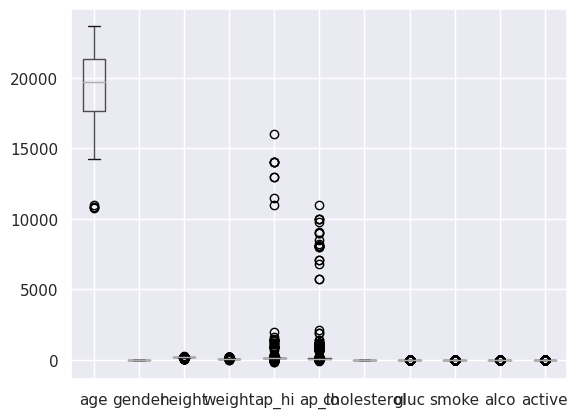

In [84]:
boxplot = dataini.boxplot(column=['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol','gluc','smoke','alco','active'])
boxplot.plot()

In [64]:
#dataini_corr = dataini.corr()
dataini_corr = dataini.corr()
#dataini_corr.round(2) -> redonde en este caso a dos cifras decimales.
dataini_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


###3.2.3 Calculo de mapa de calor de la correlación.

Text(0.0, 1.0, 'Correlación de los atributos asociados a las enfermedades cardiacas')

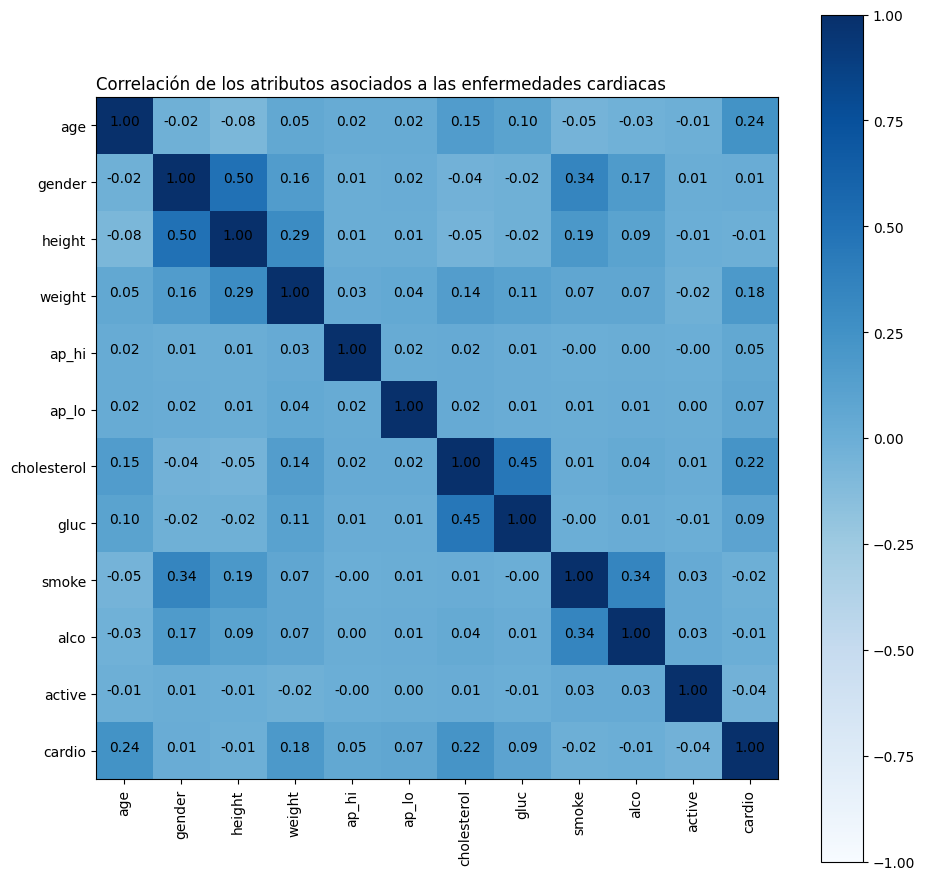

In [39]:
#Creación de la gráfrica
# imshow() función para mostrar una imagen en una pantalla
           # parametros -> los datos de la correlación, cmap: Cambio de luminosidad según el color asignado, vmin: valor minimo a representar, vmax: valor maximo a representar
           # Se escoge -1 y 1 los vmin y vmax porque la correlación se encuentra entre estos valores

graf= plt.figure(figsize=(11,11))
plt.imshow(dataini_corr, cmap="Blues", vmin=-1.0, vmax=1.0)

# Se agrega la escala del color, barra vertical
plt.colorbar()

# Agregar valores a la gráfica, {:.2f} significa que redonde a dos valores.
for i in range(12):
  for j in range(12):
    plt.text(i,j,"{:.2f}".format(dataini_corr.values[i,j]), ha="center")

#Se definen variables de ejes x , y
plt.xticks(range(12), dataini_corr.index, rotation =90)
plt.yticks(range(12), dataini_corr.index)

#Agrega el titulo a al grafica 
plt.title("Correlación de los atributos asociados a las enfermedades cardiacas", loc="left")

###3.2.4 Calculo de diagramas de dispersión bivariada. 

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


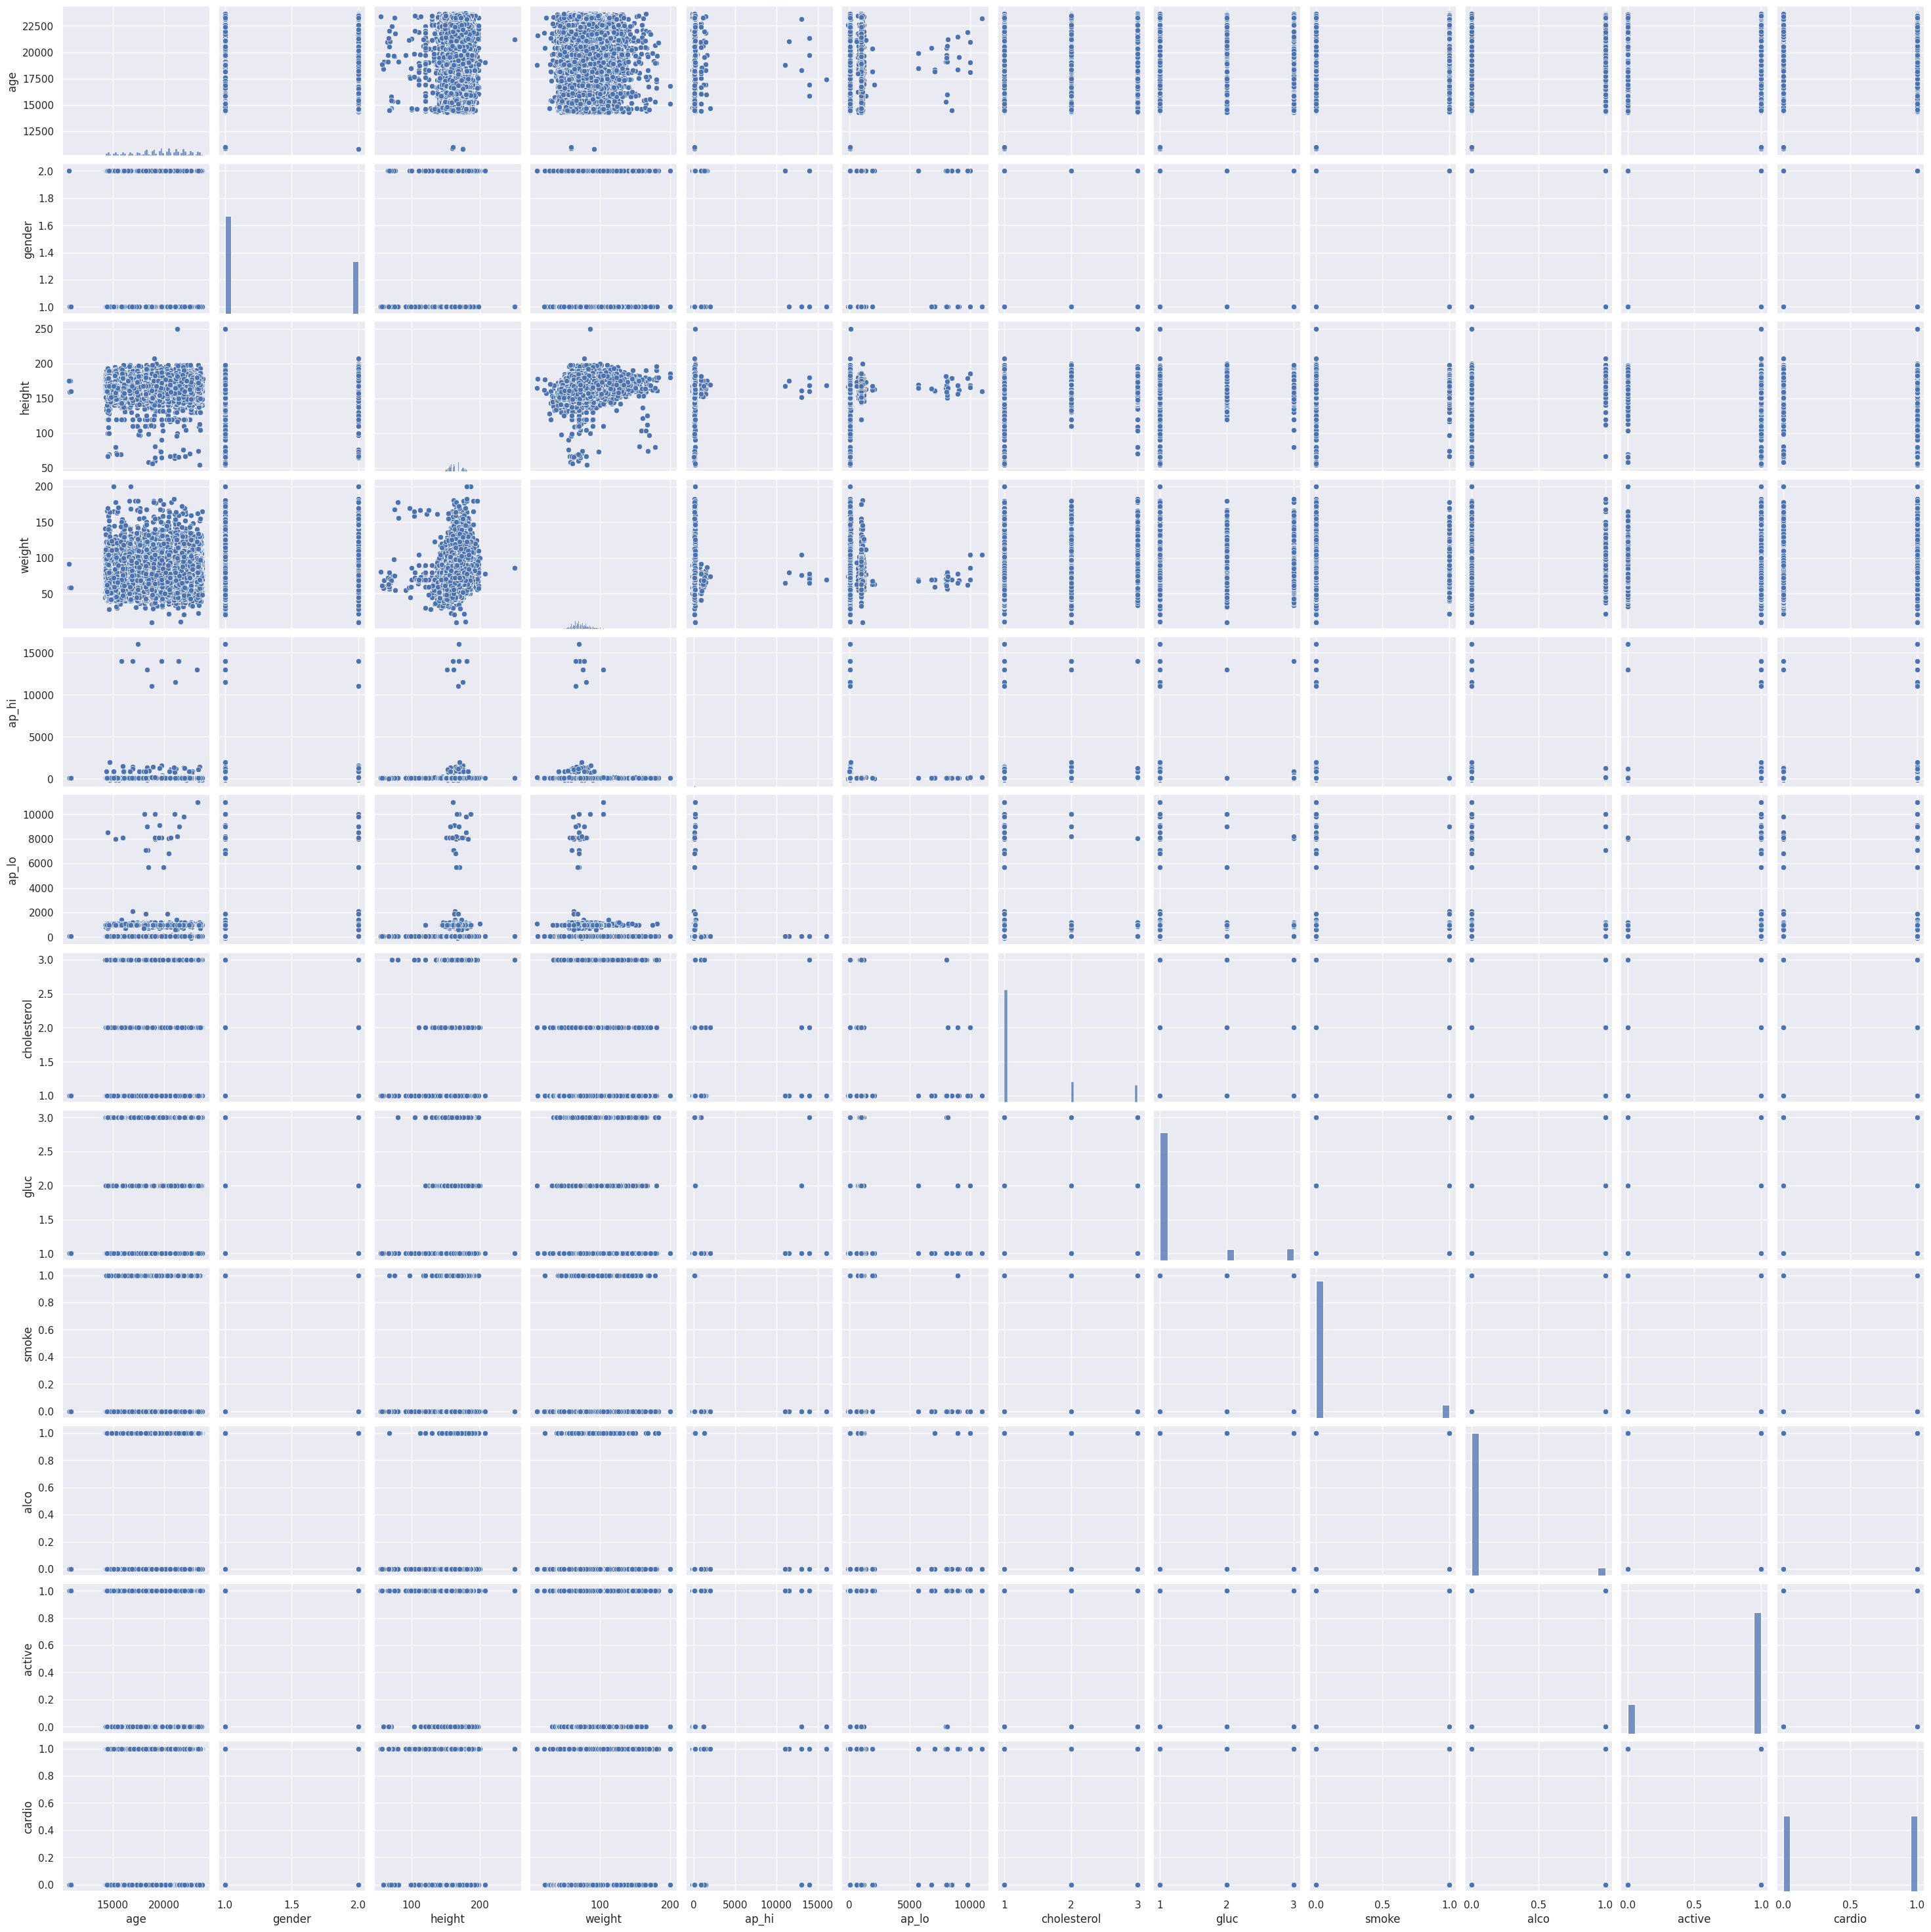

In [66]:
# Scatter plot:
#Saca todos los graficos de dispersión de las variables relacionadas de a dos, es demorado el gráfico en realizarce.
sns.set()
cols = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol','gluc','smoke','alco','active','cardio']
sns.pairplot(dataini[cols], size = 2.5)
plt.show();